In [69]:
from model import OpenDVC
import numpy as np
from load import load_local_data, load_data
import tensorflow as tf
import matplotlib.pyplot as plt

tf.executing_eagerly()

True

In [61]:
batch_size = 2
EPOCHS = 10
Height = 240
Width = 240
Channel = 3
lr_init = 1e-4
frames=2
I_QP=27

model = OpenDVC(width=Width, height=Height, batch_size=batch_size, num_filters=128)

In [71]:
# folder = ["/workspaces/tensorflow-wavelets/Development/OpenDVC/BasketballPass"]
folder = np.load("/mnt/WindowsDev/Developer/tensorflow-wavelets/folder_cloud.npy")

data = np.zeros([frames, batch_size, Height, Width, Channel])
# data = load_local_data(data, frames, batch_size, Height, Width, Channel, folder)
data = load_data(data, frames, batch_size, Height, Width, Channel, folder, I_QP)
dataset = tf.data.Dataset.from_tensor_slices(data).batch(2)



PermissionError: [Errno 13] Permission denied: '/mnt/WindowsDev/Developer/tensorflow-wavelets/folder_cloud.npy'

In [63]:
model.summary()

Model: "open_dvc_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
analysis (AnalysisTransform) (2, 15, 15, 128)          659456    
_________________________________________________________________
synthesis (SynthesisTransfor (2, 240, 240, 2)          642824    
_________________________________________________________________
analysis (AnalysisTransform) (2, 15, 15, 128)          1552640   
_________________________________________________________________
synthesis (SynthesisTransfor (2, 240, 240, 3)          1536015   
_________________________________________________________________
optical_flow_4 (OpticalFlow) multiple                  240050    
_________________________________________________________________
motion_compensation_4 (Motio multiple                  486467    
Total params: 5,121,036
Trainable params: 5,121,036
Non-trainable params: 0
______________________________________________

In [64]:
model.compile()

In [68]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',
    monitor='train_loss_total',
    mode='max',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history = model.fit(dataset, epochs=EPOCHS, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - train_loss_total: 2894848.5000 - train_loss_MV: 19491.9629 - train_loss_MC: 2896610.2500 - psnr: -40.5339 - total_mse: 11308.0020 - warp_mse: 76.1405 - MC_mse: 11314.8838
Epoch 2/10
1/1 [==============================] - 6s 6s/step - train_loss_total: 2705451.2500 - train_loss_MV: 19539.8008 - train_loss_MC: 2708187.5000 - psnr: -40.2400 - total_mse: 10568.1689 - warp_mse: 76.3273 - MC_mse: 10578.8574
Epoch 3/10
1/1 [==============================] - 6s 6s/step - train_loss_total: 2501224.2500 - train_loss_MV: 19604.5371 - train_loss_MC: 2505169.2500 - psnr: -39.8991 - total_mse: 9770.4072 - warp_mse: 76.5802 - MC_mse: 9785.8174
Epoch 4/10
1/1 [==============================] - 6s 6s/step - train_loss_total: 2279612.0000 - train_loss_MV: 19613.3594 - train_loss_MC: 2285106.5000 - psnr: -39.4962 - total_mse: 8904.7344 - warp_mse: 76.6147 - MC_mse: 8926.1973
Epoch 5/10
1/1 [==============================] - 6s 6s/step - train

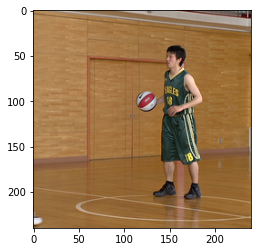

In [ ]:
plt.imshow(elem[1,0,:,:,:].numpy().astype("uint8"))